<a href="https://colab.research.google.com/github/RUCHA3100/ML-practicals/blob/main/Prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN 


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

persons=["Rucha","Viraj","Meera","Rohan","Esha","Pranjal","Amer","Bhavesh","Neha","Seeta"]
disease=["Sugar","BP","Sugar","Sugar","Sugar","Healthy","Healthy","BP","Healthy","BP"]
result=["Yes","Yes","Yes","Yes","Yes","No","No","Yes","No","Yes"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label1=le.fit_transform(persons)
print("Label 1 :")
print(label1)

Label 1 :
[7 9 3 6 2 5 0 1 4 8]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label2=le.fit_transform(disease)
print("Label 2 :")
print(label2)

Label 2 :
[2 0 2 2 2 1 1 0 1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label3=le.fit_transform(result)
print("Label 3 :")
print(label3)

Label 3 :
[1 1 1 1 1 0 0 1 0 1]


In [ ]:
data = list(zip(label1,label2))
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data,label3)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
test_new_x=8
test_new_y=0
new_point = [(test_new_x,test_new_y)]
prediction = (knn.predict(new_point))
print("Prediction that a person is diseased or not : ")
print(prediction)

Prediction that a person is diseased or not : 
[1]


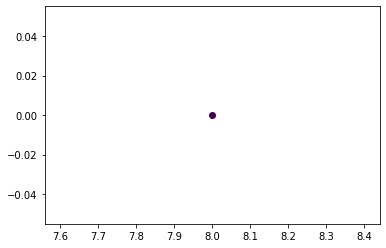

In [ ]:
plt.scatter(test_new_x,test_new_y,c=prediction)
plt.show()

LINEAR REGRESSION


Estimated coefficients:
b_0 = 3.0036337408984766 		
b_1 = 0.9709438109630438


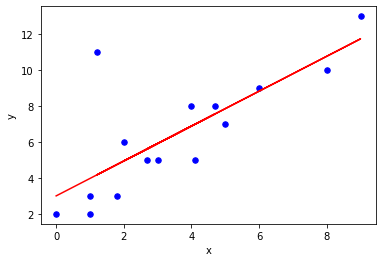

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	n = np.size(x)

	m_x = np.mean(x)
	m_y = np.mean(y)

	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	plt.scatter(x, y, color = "blue",
			marker = "o", s = 30)

	y_pred = b[0] + b[1]*x

	plt.plot(x, y_pred, color = "red")

	plt.xlabel('x')
	plt.ylabel('y')

	plt.show()

def main():
	x = np.array([0, 1, 1,3, 2 ,4, 5, 6, 8, 9, 2.7, 4.7, 1.2, 1.8, 4.1])
	y = np.array([2, 3, 2, 5, 6, 8, 7, 9, 10, 13 ,5, 8, 11, 3, 5])

	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


Gaussian Naive Bayes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')
X = dataset.iloc[:,:4].values
y = dataset['species'].values
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


splitting data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test) 
y_pred

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9333333333333333


array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  8]])

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,versicolor,versicolor
1,setosa,setosa
2,versicolor,versicolor
3,virginica,virginica
4,virginica,virginica
5,virginica,versicolor
6,versicolor,versicolor
7,versicolor,versicolor
8,setosa,setosa
9,setosa,setosa
